

# BUMBLE PROJECT

-----------------------------------------------------

# Objective

Questions to answer: 

- Are there any differences in the way males and females vote?

- Are there factors which lead to an increased level of popularity of the user being voted on?

- How about attributes that are shared between the active and passive user?

# Table of contents

1) EDA

2) Setting a target variable

3) Analyzing each variable's relation with the target variable

# 1) EDA

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
import sys
sys.path.append('..')
pd.set_option('display.max_columns', 50)

## Inspect "Events" file

In [2]:
data = pd.read_csv('../Data/events.csv')
data.head(3)

Active User  Passive User  yes_vote
0        38411         54288         0
1        50211         34398         0
2        45114         43284         1

In [3]:
data.isnull().sum()

Active User     0
Passive User    0
yes_vote        0
dtype: int64

In [4]:
data.yes_vote.value_counts()

0    175174
1    115436
Name: yes_vote, dtype: int64

In [5]:
# average user popularity
data.groupby('Passive User').mean().reset_index().mean()['yes_vote']

0.3149720225442795

In [6]:
data.shape

(290610, 3)

In [7]:
data['Active User'].unique().shape

(51438,)

In [8]:
data['Passive User'].unique().shape

(50789,)

In [9]:
data.groupby('Passive User').mean()['yes_vote'].reset_index().head()

Passive User  yes_vote
0             0  0.000000
1             1  0.166667
2             2  0.000000
3             3  0.000000
4             4  0.000000

(array([17169.,  2324.,  5743.,  4545.,  3582.,  8673.,  3926.,  2196.,
         1464.,  1167.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

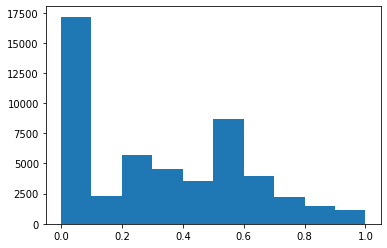

In [10]:
# Popularity frequency
plt.hist(data.groupby('Passive User').mean()['yes_vote'].reset_index()['yes_vote'])

## Inspect "User_profiles" file

In [11]:
data_2 = pd.read_csv('../Data/user_profiles.csv')
data_2.head(3)

age       body_type    drinks      drugs  \
0   22  a little extra  socially      never   
1   35         average     often  sometimes   
2   38            thin  socially        NaN   

                                              essay0  \
0  about me:<br />\n<br />\ni would love to think...   
1  i am a chef: this is what that means.<br />\n1...   
2  i'm not ashamed of much, but writing public te...   

                                              essay1  \
0  currently working as an international agent fo...   
1  dedicating everyday to being an unbelievable b...   
2  i make nerdy software for musicians, artists, ...   

                                              essay2  \
0  making people laugh.<br />\nranting about a go...   
1  being silly. having ridiculous amonts of fun w...   
2  improvising in different contexts. alternating...   

                                              essay3  \
0  the way i look. i am a six foot half asian, ha...   
1                                                NaN   
2  my large jaw and large glasses are the physica...   

                                              essay4  \
0  books:<br />\nabsurdistan, the republic, of mi...   
1  i am die hard christopher moore fan. i don't r...   
2  okay this is where the cultural matrix gets so...   

                                              essay5  \
0  food.<br />\nwater.<br />\ncell phone.<br />\n...   
1  delicious porkness in all of its glories.<br /...   
2  movement<br />\nconversation<br />\ncreation<b...   

                        essay6  \
0  duality and humorous things   
1                          NaN   
2                          NaN   

                                              essay7  \
0  trying to find someone to hang out with. i am ...   
1                                                NaN   
2  viewing. listening. dancing. talking. drinking...   

                                              essay8  \
0  i am new to california and looking for someone...   
1  i am very open and will share just about anyth...   
2  when i was five years old, i was known as "the...   

                                              essay9     ethnicity  height  \
0  you want to be swept off your feet!<br />\nyou...  asian, white    75.0   
1                                                NaN         white    70.0   
2  you are bright, open, intense, silly, ironic, ...           NaN    68.0   

   income                   job                                     offspring  \
0      -1        transportation  doesn&rsquo;t have kids, but might want them   
1   80000  hospitality / travel  doesn&rsquo;t have kids, but might want them   
2      -1                   NaN                                           NaN   

  orientation                       pets  \
0    straight  likes dogs and likes cats   
1    straight  likes dogs and likes cats   
2    straight                   has cats   

                                   religion sex  \
0     agnosticism and very serious about it   m   
1  agnosticism but not too serious about it   m   
2                                       NaN   m   

                                 sign     smokes  UID  
0                              gemini  sometimes    0  
1                              cancer         no    1  
2  pisces but it doesn&rsquo;t matter         no    2

In [12]:
data_2.isnull().sum()

age                0
body_type       5296
drinks          2985
drugs          14080
essay0          5488
essay1          7572
essay2          9638
essay3         11476
essay4         10537
essay5         10850
essay6         13771
essay7         12451
essay8         19225
essay9         12603
ethnicity       5680
height             3
income             0
job             8198
offspring      35561
orientation        0
pets           19921
religion       20226
sex                0
sign           11056
smokes          5512
UID                0
dtype: int64

In [13]:
essay_cols = [4,5,6,7,8,9,10,11,12,13]
data_3 = data_2.drop(data_2.columns[essay_cols], axis=1).copy()
data_3.head(3)

age       body_type    drinks      drugs     ethnicity  height  income  \
0   22  a little extra  socially      never  asian, white    75.0      -1   
1   35         average     often  sometimes         white    70.0   80000   
2   38            thin  socially        NaN           NaN    68.0      -1   

                    job                                     offspring  \
0        transportation  doesn&rsquo;t have kids, but might want them   
1  hospitality / travel  doesn&rsquo;t have kids, but might want them   
2                   NaN                                           NaN   

  orientation                       pets  \
0    straight  likes dogs and likes cats   
1    straight  likes dogs and likes cats   
2    straight                   has cats   

                                   religion sex  \
0     agnosticism and very serious about it   m   
1  agnosticism but not too serious about it   m   
2                                       NaN   m   

                                 sign     smokes  UID  
0                              gemini  sometimes    0  
1                              cancer         no    1  
2  pisces but it doesn&rsquo;t matter         no    2

In [14]:
data_3.isnull().sum()

age                0
body_type       5296
drinks          2985
drugs          14080
ethnicity       5680
height             3
income             0
job             8198
offspring      35561
orientation        0
pets           19921
religion       20226
sex                0
sign           11056
smokes          5512
UID                0
dtype: int64

## Let's analyse each variable separately

### 1. Age

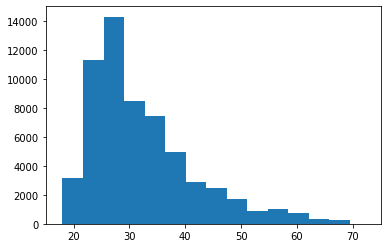

In [15]:
plt.hist(data_3.age, bins=25)
plt.xlim([15,75])
plt.show()

In [16]:
# Identifying and removing unrealistic outliers
mask = data_3.age>70
data_3.loc[mask,'age'].head()

2512     110
25324    109
Name: age, dtype: int64

In [17]:
mask_2 = data_3.age<=70
data_4 = data_3.loc[mask_2,:]
data_4.age.describe()

count    59944.000000
mean        32.337715
std          9.442423
min         18.000000
25%         26.000000
50%         30.000000
75%         37.000000
max         69.000000
Name: age, dtype: float64

### 2. Body type

<AxesSubplot:>

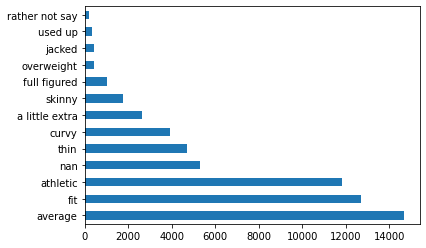

In [18]:
data_4.body_type.value_counts(dropna=False).plot.barh()

In [19]:
data_4 = data_4.copy()
data_4.body_type = data_4.body_type.copy().replace(np.nan,'No response')

### 3. Drinks

<AxesSubplot:>

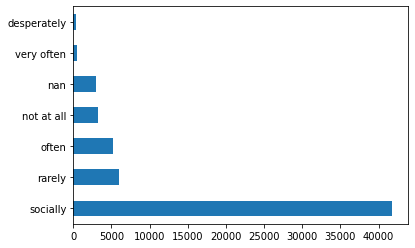

In [20]:
data_4.drinks.value_counts(dropna=False).plot.barh()

In [21]:
data_4.drinks = data_4.drinks.replace(np.nan,'No response')

### 4. Drugs

In [22]:
def plot_categorical (df, col_name):
    df[col_name].value_counts(dropna=False).plot.barh()
    plt.title(col_name)
    plt.show()

In [23]:
data_4.drugs = data_4.drugs.replace(np.nan,'No response')

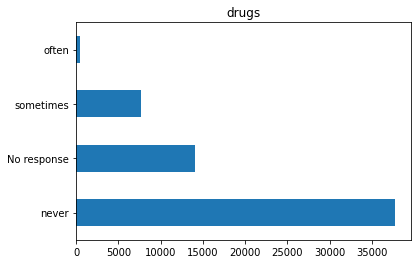

In [24]:
plot_categorical(data_4,'drugs')

### 5. Ethnicity

In [25]:
data_4.ethnicity.value_counts(dropna=False).head(10)

white                      32831
asian                       6134
NaN                         5678
hispanic / latin            2823
black                       2008
other                       1706
hispanic / latin, white     1301
indian                      1077
asian, white                 811
white, other                 641
Name: ethnicity, dtype: int64

In [26]:
uniques = data_4.ethnicity.unique()
uniques[:3]

array(['asian, white', 'white', nan], dtype=object)

In [27]:
main_races = ['white', 'asian', 'hispanic / latin', 'black']
dict_1 = {}
for unique in uniques:
    if unique == np.nan:
        dict_1[np.nan]='No response'
    elif unique not in main_races:
        dict_1[unique] = 'other'        

In [28]:
data_4 = data_4.copy()
data_4.ethnicity = data_4.ethnicity.replace(dict_1)

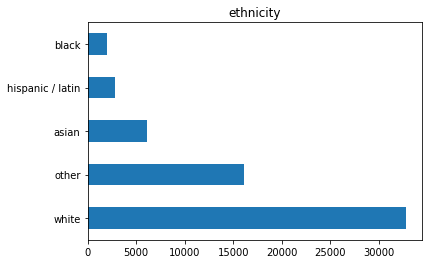

In [29]:
plot_categorical(data_4,'ethnicity')

### 6. Height

(array([6.0000e+00, 0.0000e+00, 1.0000e+00, 1.3000e+01, 4.0000e+00,
        4.6000e+01, 1.9575e+04, 3.9723e+04, 5.4000e+02, 3.3000e+01]),
 array([ 1. , 10.4, 19.8, 29.2, 38.6, 48. , 57.4, 66.8, 76.2, 85.6, 95. ]),
 <BarContainer object of 10 artists>)

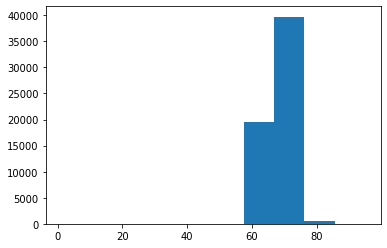

In [30]:
plt.hist(data_4.height)

In [31]:
height_median = data_4.height.median()
height_median

68.0

In [32]:
dict_2 = {}
for unique in data_4.height.unique():
    if unique == np.nan or unique<60 or unique>80:
        dict_2[unique] = height_median        

In [33]:
data_4.height = data_4.height.fillna(height_median)

In [34]:
data_4 = data_4.copy()
data_4.height = data_4.height.replace(dict_2)

In [35]:
data_4 = data_4.rename(columns={'height':'height_cm'})
data_4.height_cm = data_4.height_cm * 2.54

(array([ 4125.,  2767.,  7659., 10112., 11043., 10900.,  8130.,  3929.,
         1063.,   216.]),
 array([152.4 , 157.48, 162.56, 167.64, 172.72, 177.8 , 182.88, 187.96,
        193.04, 198.12, 203.2 ]),
 <BarContainer object of 10 artists>)

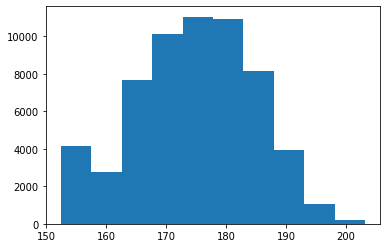

In [36]:
plt.hist(data_4.height_cm)

In [37]:
data_4.isnull().sum()

age                0
body_type          0
drinks             0
drugs              0
ethnicity          0
height_cm          0
income             0
job             8197
offspring      35560
orientation        0
pets           19919
religion       20225
sex                0
sign           11055
smokes          5511
UID                0
dtype: int64

### 7. Income

In [38]:
data_4.income.value_counts(dropna=False)

-1          48440
 20000       2952
 100000      1621
 80000       1111
 30000       1048
 40000       1005
 50000        975
 60000        736
 70000        707
 150000       631
 1000000      521
 250000       149
 500000        48
Name: income, dtype: int64

(-10000.0, 350000.0)

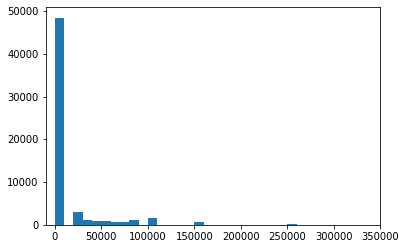

In [39]:
plt.hist(data_4.income, bins=100)
plt.xlim((-10000,350000))

In [40]:
dict_3 = {}
for unique in data_4.income.unique():
    if unique == np.nan or unique<0:
        dict_3[unique] = data_4.income.mean()
dict_3

{-1: 20033.890964900573}

In [41]:
data_4.income.value_counts()

-1          48440
 20000       2952
 100000      1621
 80000       1111
 30000       1048
 40000       1005
 50000        975
 60000        736
 70000        707
 150000       631
 1000000      521
 250000       149
 500000        48
Name: income, dtype: int64

In [42]:
data_4.income = data_4.income.replace(dict_3)

### 8. Job

In [43]:
data_4.job.value_counts(dropna=False)

NaN                                  8197
other                                7589
student                              4881
science / tech / engineering         4848
computer / hardware / software       4709
artistic / musical / writer          4439
sales / marketing / biz dev          4391
medicine / health                    3680
education / academia                 3513
executive / management               2373
banking / financial / real estate    2266
entertainment / media                2250
law / legal services                 1381
hospitality / travel                 1364
construction / craftsmanship         1021
clerical / administrative             805
political / government                708
rather not say                        436
transportation                        366
unemployed                            273
retired                               250
military                              204
Name: job, dtype: int64

In [44]:
data_4.job = data_4.job.replace(np.nan,'No response')

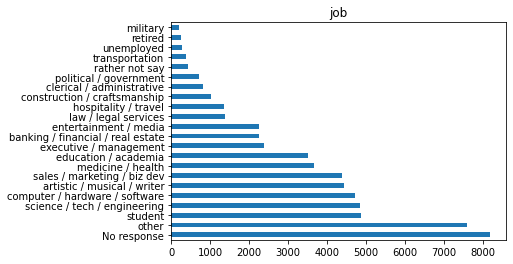

In [45]:
plot_categorical(data_4,'job')

### 9. Offspring

In [46]:
data_4.offspring.value_counts(dropna=False)

NaN                                                    35560
doesn&rsquo;t have kids                                 7560
doesn&rsquo;t have kids, but might want them            3875
doesn&rsquo;t have kids, but wants them                 3565
doesn&rsquo;t want kids                                 2927
has kids                                                1883
has a kid                                               1881
doesn&rsquo;t have kids, and doesn&rsquo;t want any     1132
has kids, but doesn&rsquo;t want more                    442
has a kid, but doesn&rsquo;t want more                   275
has a kid, and might want more                           231
wants kids                                               225
might want kids                                          181
has kids, and might want more                            115
has a kid, and wants more                                 71
has kids, and wants more                                  21
Name: offspring, dtype: 

In [47]:
data_4.offspring = data_4.offspring.replace(np.nan,'No response')

In [48]:
data_4 = data_4.copy()
data_4['has_kids'] = 'No'
data_4 = data_4.reset_index(drop=True)

In [49]:
for n in list(range(0,data_4.offspring.shape[0])):
    element = data_4.loc[n, 'offspring']
    if 'has' in element:
        data_4.loc[n, 'has_kids'] = 'Yes'

In [50]:
data_4.has_kids.value_counts()

No     55025
Yes     4919
Name: has_kids, dtype: int64

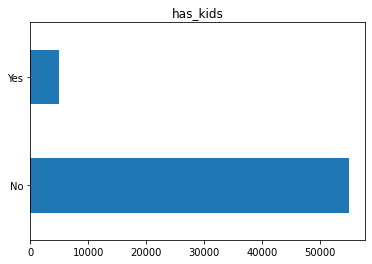

In [51]:
plot_categorical(data_4,'has_kids')

### 10. Orientation

In [52]:
data_4.orientation.value_counts(dropna=False).head(20)

straight    51604
gay          5573
bisexual     2767
Name: orientation, dtype: int64

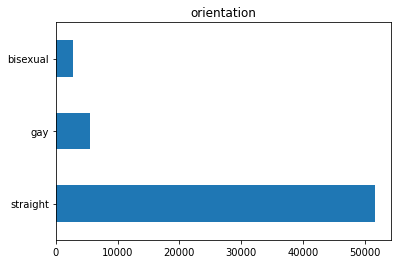

In [53]:
plot_categorical(data_4,'orientation')

### 11. Pets

In [54]:
data_4.pets.value_counts(dropna=False).head(20)

NaN                                19919
likes dogs and likes cats          14814
likes dogs                          7224
likes dogs and has cats             4313
has dogs                            4134
has dogs and likes cats             2333
likes dogs and dislikes cats        2029
has dogs and has cats               1474
has cats                            1406
likes cats                          1063
has dogs and dislikes cats           552
dislikes dogs and likes cats         240
dislikes dogs and dislikes cats      196
dislikes cats                        122
dislikes dogs and has cats            81
dislikes dogs                         44
Name: pets, dtype: int64

In [55]:
data_4.pets = data_4.pets.replace(np.nan,'No response')

In [56]:
data_4 = data_4.copy().reset_index(drop=True)

data_4['likes_dogs'] = 'No'
for n in list(range(0,data_4.pets.shape[0])):
    element = data_4.loc[n, 'pets']
    if 'likes dogs' in element:
        data_4.loc[n, 'likes_dogs'] = 'Yes'

data_4['likes_cats'] = 'No'
for n in list(range(0,data_4.pets.shape[0])):
    element = data_4.loc[n, 'pets']
    if 'likes cats' in element:
        data_4.loc[n, 'likes_cats'] = 'Yes'

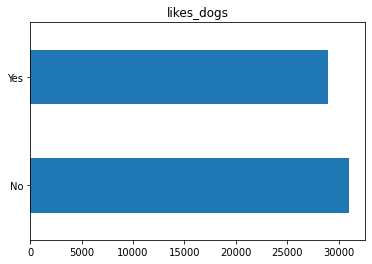

In [57]:
plot_categorical(data_4, 'likes_dogs')

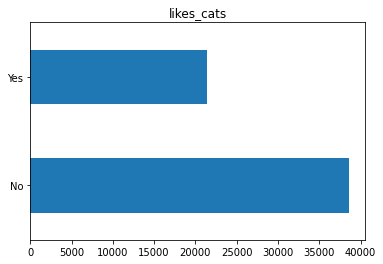

In [58]:
plot_categorical(data_4, 'likes_cats')

### 12. Religion

In [59]:
data_4.religion.value_counts(dropna=False).head(20)

NaN                                           20225
agnosticism                                    2724
other                                          2691
agnosticism but not too serious about it       2636
agnosticism and laughing about it              2496
catholicism but not too serious about it       2318
atheism                                        2175
other and laughing about it                    2119
atheism and laughing about it                  2074
christianity                                   1957
christianity but not too serious about it      1952
other but not too serious about it             1554
judaism but not too serious about it           1517
atheism but not too serious about it           1318
catholicism                                    1064
christianity and somewhat serious about it      927
atheism and somewhat serious about it           848
other and somewhat serious about it             845
catholicism and laughing about it               726
judaism and 

In [60]:
data_4.religion = data_4.religion.replace(np.nan,'No response')

In [61]:
data_4 = data_4.copy().reset_index(drop=True)

data_4['reported_religion'] = 'No'

for n in list(range(0,data_4.religion.shape[0])):
    element = data_4.loc[n, 'religion']
    if 'No response' not in element:
        data_4.loc[n, 'reported_religion'] = 'Yes'

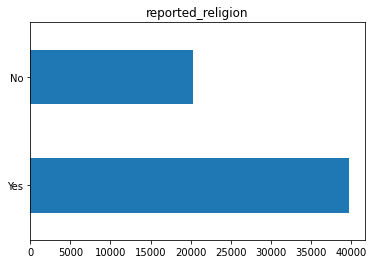

In [62]:
plot_categorical(data_4, 'reported_religion')

### 13. Sex

In [63]:
data_4.sex.value_counts(dropna=False).head(20)

m    35828
f    24116
Name: sex, dtype: int64

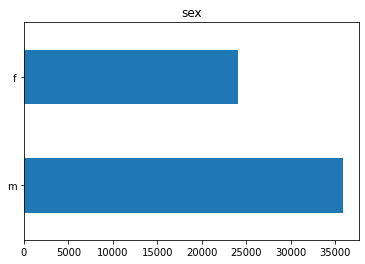

In [64]:
plot_categorical(data_4, 'sex')

### 14. Sign

In [65]:
data_4.sign.value_counts(dropna=False).head()

NaN                                          11055
gemini and it&rsquo;s fun to think about      1782
scorpio and it&rsquo;s fun to think about     1772
leo and it&rsquo;s fun to think about         1692
libra and it&rsquo;s fun to think about       1649
Name: sign, dtype: int64

In [66]:
care_about_sign = []
dont_care = []
for unique in data_4.sign.unique():
    if "fun to think" in str(unique):
        care_about_sign.append(unique)
    elif "matter" in str(unique):
        dont_care.append(unique)
dont_care[:2]

['pisces but it doesn&rsquo;t matter', 'gemini but it doesn&rsquo;t matter']

In [67]:
dict_5 = {}
for element in data_4.sign.value_counts(dropna=False).reset_index()['index']:
    if element in care_about_sign:
        dict_5[element] = 'Care about sign'
    elif element in dont_care:
        dict_5[element] = "Does not care about sign"
    else:
        dict_5[element] = "No response"
dict_5

{nan: 'No response',
 'gemini and it&rsquo;s fun to think about': 'Care about sign',
 'scorpio and it&rsquo;s fun to think about': 'Care about sign',
 'leo and it&rsquo;s fun to think about': 'Care about sign',
 'libra and it&rsquo;s fun to think about': 'Care about sign',
 'taurus and it&rsquo;s fun to think about': 'Care about sign',
 'cancer and it&rsquo;s fun to think about': 'Care about sign',
 'pisces and it&rsquo;s fun to think about': 'Care about sign',
 'sagittarius and it&rsquo;s fun to think about': 'Care about sign',
 'virgo and it&rsquo;s fun to think about': 'Care about sign',
 'aries and it&rsquo;s fun to think about': 'Care about sign',
 'aquarius and it&rsquo;s fun to think about': 'Care about sign',
 'virgo but it doesn&rsquo;t matter': 'Does not care about sign',
 'leo but it doesn&rsquo;t matter': 'Does not care about sign',
 'cancer but it doesn&rsquo;t matter': 'Does not care about sign',
 'gemini but it doesn&rsquo;t matter': 'Does not care about sign',
 'taurus 

In [68]:
data_4.sign = data_4.sign.replace(dict_5)
data_4.head(3)

age       body_type    drinks        drugs ethnicity  height_cm  \
0   22  a little extra  socially        never     other     190.50   
1   35         average     often    sometimes     white     177.80   
2   38            thin  socially  No response     other     172.72   

         income                   job  \
0  20033.890965        transportation   
1  80000.000000  hospitality / travel   
2  20033.890965           No response   

                                      offspring orientation  \
0  doesn&rsquo;t have kids, but might want them    straight   
1  doesn&rsquo;t have kids, but might want them    straight   
2                                   No response    straight   

                        pets                                  religion sex  \
0  likes dogs and likes cats     agnosticism and very serious about it   m   
1  likes dogs and likes cats  agnosticism but not too serious about it   m   
2                   has cats                               No response   m   

                       sign     smokes  UID has_kids likes_dogs likes_cats  \
0               No response  sometimes    0       No        Yes        Yes   
1               No response         no    1       No        Yes        Yes   
2  Does not care about sign         no    2       No         No         No   

  reported_religion  
0               Yes  
1               Yes  
2                No

### 15. Smokes

In [69]:
data_4.smokes.value_counts(dropna=False).head(20)

no                43896
NaN                5511
sometimes          3787
when drinking      3039
yes                2231
trying to quit     1480
Name: smokes, dtype: int64

In [70]:
data_4 = data_4.copy()
data_4.smokes = data_4.smokes.replace(np.nan,'No response')

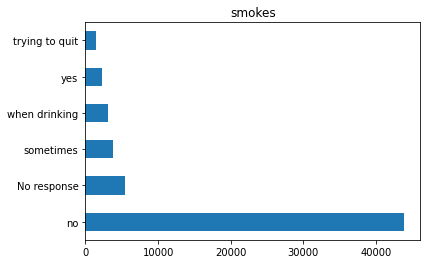

In [71]:
plot_categorical(data_4, 'smokes')

### 16. UID

In [72]:
data_4.UID.shape[0]

59944

In [73]:
data_4.UID.unique().shape[0]

59944

-------------------------------------------------------------------

# 2) Setting a target variable - yes_vote ratio

In [74]:
data.head(3)

Active User  Passive User  yes_vote
0        38411         54288         0
1        50211         34398         0
2        45114         43284         1

In [75]:
users = data[["Passive User", "yes_vote"]].copy()
users.head(3)

Passive User  yes_vote
0         54288         0
1         34398         0
2         43284         1

In [76]:
users = users.groupby("Passive User").mean().reset_index()
users.head(3)

Passive User  yes_vote
0             0  0.000000
1             1  0.166667
2             2  0.000000

In [77]:
users = users.rename(columns={'Passive User':'UID'})
users.head()

UID  yes_vote
0    0  0.000000
1    1  0.166667
2    2  0.000000
3    3  0.000000
4    4  0.000000

## Merging both dataframes

In [78]:
df = pd.merge(data_4, users, on = "UID")
df.head(3)

age       body_type    drinks        drugs ethnicity  height_cm  \
0   22  a little extra  socially        never     other     190.50   
1   35         average     often    sometimes     white     177.80   
2   38            thin  socially  No response     other     172.72   

         income                   job  \
0  20033.890965        transportation   
1  80000.000000  hospitality / travel   
2  20033.890965           No response   

                                      offspring orientation  \
0  doesn&rsquo;t have kids, but might want them    straight   
1  doesn&rsquo;t have kids, but might want them    straight   
2                                   No response    straight   

                        pets                                  religion sex  \
0  likes dogs and likes cats     agnosticism and very serious about it   m   
1  likes dogs and likes cats  agnosticism but not too serious about it   m   
2                   has cats                               No response   m   

                       sign     smokes  UID has_kids likes_dogs likes_cats  \
0               No response  sometimes    0       No        Yes        Yes   
1               No response         no    1       No        Yes        Yes   
2  Does not care about sign         no    2       No         No         No   

  reported_religion  yes_vote  
0               Yes  0.000000  
1               Yes  0.166667  
2                No  0.000000

In [79]:
df = df.drop(columns=(['orientation', 'religion', 'offspring', 'pets']))

## Splitting data into Male and Female

In [80]:
bool_5 = df.sex=='m'
m_data = df.loc[bool_5,:].copy()
m_data.head(3)

age       body_type    drinks        drugs ethnicity  height_cm  \
0   22  a little extra  socially        never     other     190.50   
1   35         average     often    sometimes     white     177.80   
2   38            thin  socially  No response     other     172.72   

         income                   job sex                      sign  \
0  20033.890965        transportation   m               No response   
1  80000.000000  hospitality / travel   m               No response   
2  20033.890965           No response   m  Does not care about sign   

      smokes  UID has_kids likes_dogs likes_cats reported_religion  yes_vote  
0  sometimes    0       No        Yes        Yes               Yes  0.000000  
1         no    1       No        Yes        Yes               Yes  0.166667  
2         no    2       No         No         No                No  0.000000

In [81]:
bool_6 = df.sex=='f'
f_data = df.loc[bool_6,:].copy()
f_data.head(3)

age    body_type    drinks        drugs ethnicity  height_cm        income  \
6   32          fit  socially        never     other     165.10  20033.890965   
7   31      average  socially        never     white     165.10  20033.890965   
8   24  No response  socially  No response     white     170.18  20033.890965   

                           job sex                      sign         smokes  \
6                  No response   f               No response    No response   
7  artistic / musical / writer   f               No response             no   
8                  No response   f  Does not care about sign  when drinking   

   UID has_kids likes_dogs likes_cats reported_religion  yes_vote  
6    6       No        Yes        Yes                No  0.800000  
7    7       No        Yes        Yes               Yes  0.333333  
8    8       No        Yes        Yes               Yes  0.600000

In [82]:
f_data.shape[0]+m_data.shape[0]==df.shape[0]

True

-------------------------------------------------------------------

# 3) Analysis - Variables vs Target variable

In [83]:
categorical_vars = ['body_type', 'drugs', 'ethnicity', 'job','sign', 'smokes', 'has_kids', 'likes_dogs', 'likes_cats', 'reported_religion']
numerical_vars = ['age', 'height_cm', 'income']

In [84]:
px.imshow(m_data.corr()).show()

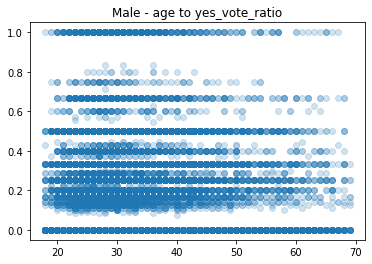

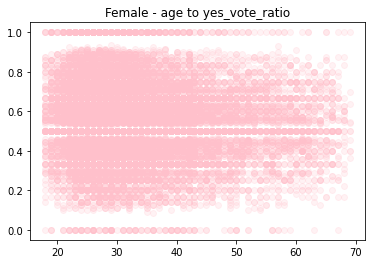

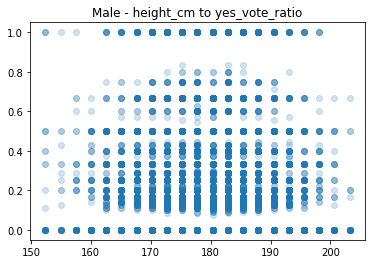

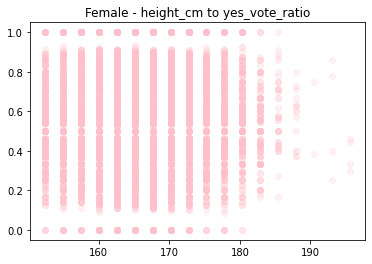

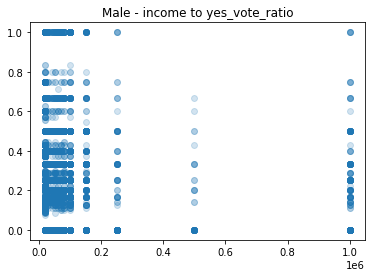

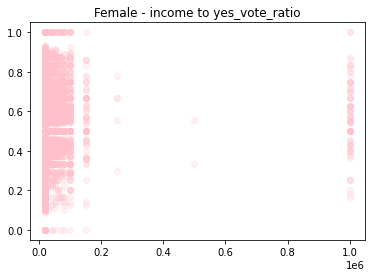

In [85]:
for num in numerical_vars:
    plt.scatter(m_data[num], m_data['yes_vote'], alpha=0.2)
    plt.title('Male - ' + num +' to yes_vote_ratio')
    plt.show()
    
    plt.scatter(f_data[num], f_data['yes_vote'], alpha=0.2, color='Pink')
    plt.title('Female - ' + num +' to yes_vote_ratio')
    plt.show()

In [86]:
import statsmodels.formula.api as smf

In [87]:
formula = 'yes_vote ~ age + height_cm + income + has_kids + likes_dogs + likes_cats + reported_religion'
model = smf.ols(formula, data=m_data)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               yes_vote   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     31.14
Date:                Fri, 07 May 2021   Prob (F-statistic):           2.58e-43
Time:                        16:27:21   Log-Likelihood:                 3120.6
No. Observations:               30258   AIC:                            -6225.
Df Residuals:                   30250   BIC:                            -6159.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    0.1442      0.032      4.543      0.000       0.082       0.206
has_kids[T.Yes]             -0.0029      0.005     -0.546      0.585      -0.013       0.007
likes_dogs[T.Yes]            0.0172      0.003      5.741      0.000       0.011       0.023
likes_cats[T.Yes]            0.0200      0.003      6.433      0.000       0.014       0.026
reported_religion[T.Yes]     0.0089      0.003      3.267      0.001       0.004       0.014
age                          0.0006      0.000      4.167      0.000       0.000       0.001
height_cm                   -0.0002      0.000     -1.019      0.308      -0.001       0.000
income                    1.055e-08   1.16e-08      0.914      0.361   -1.21e-08    3.32e-08
==============================================================================
Omnibus:                     9294.238   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            25353.718
Skew:                           1.658   Prob(JB):                         0.00
Kurtosis:                       6.018   Cond. No.                     2.95e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.95e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [88]:
styles = plt.style.available
plt.style.use('default')
styles[:3]

['Solarize_Light2', '_classic_test_patch', 'bmh']

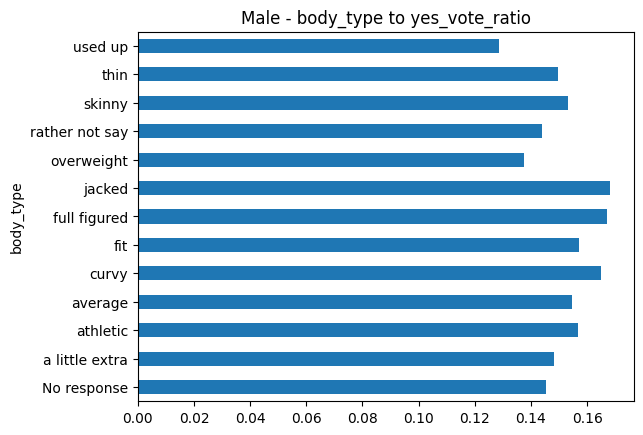

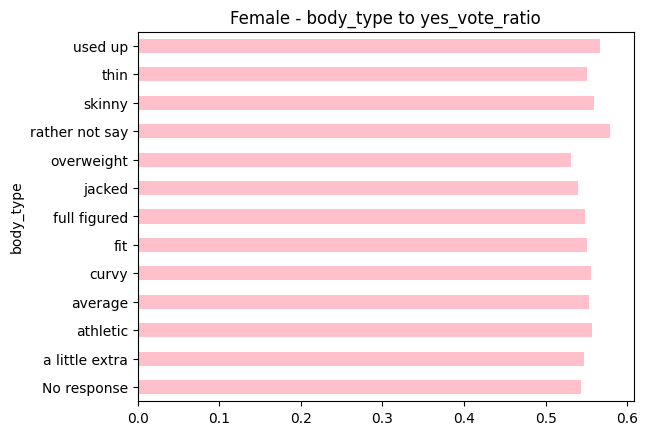

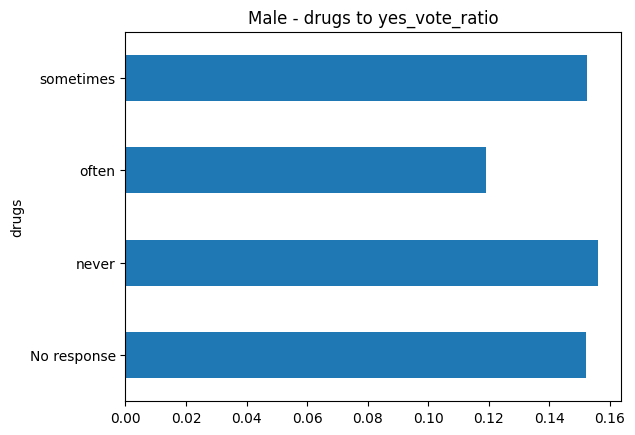

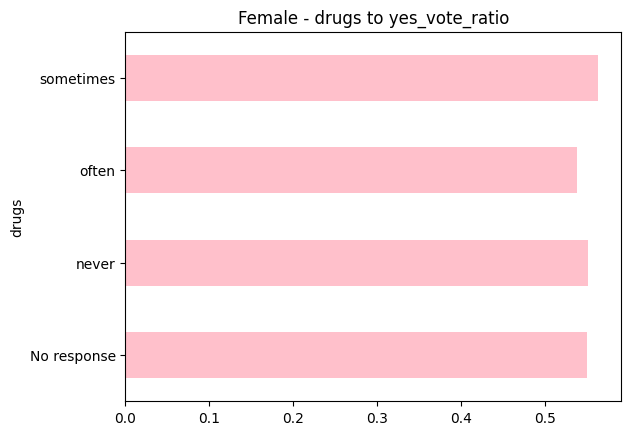

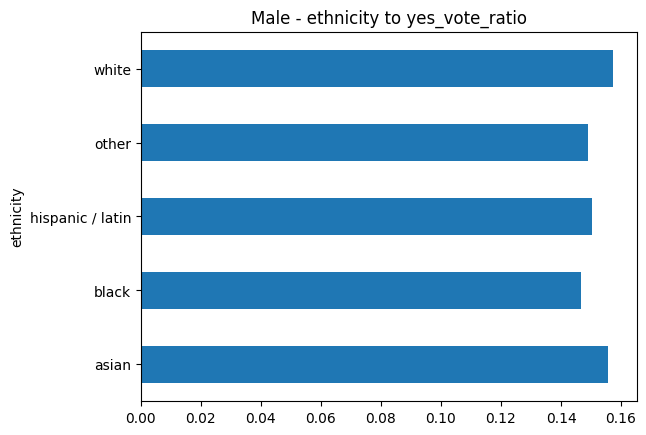

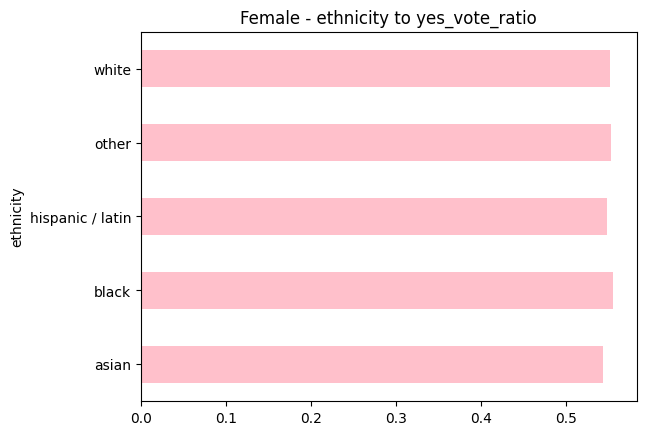

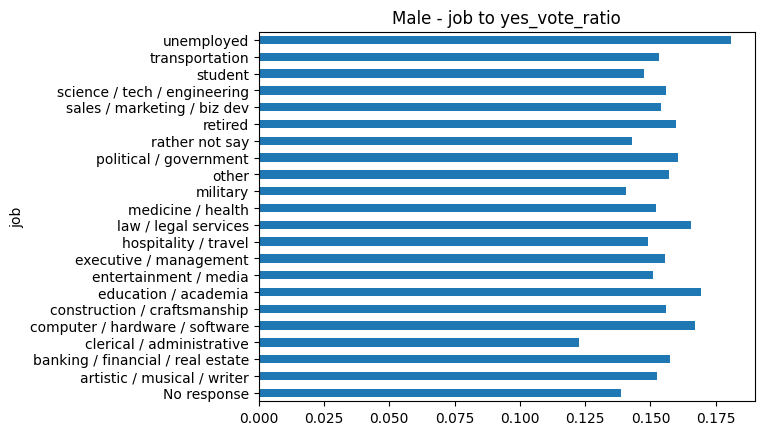

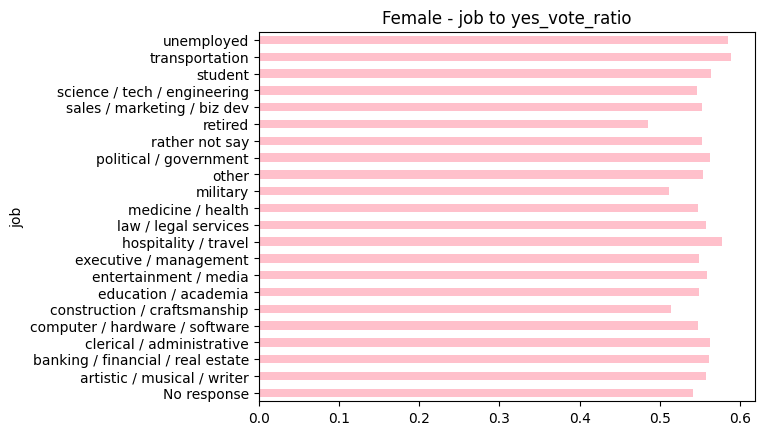

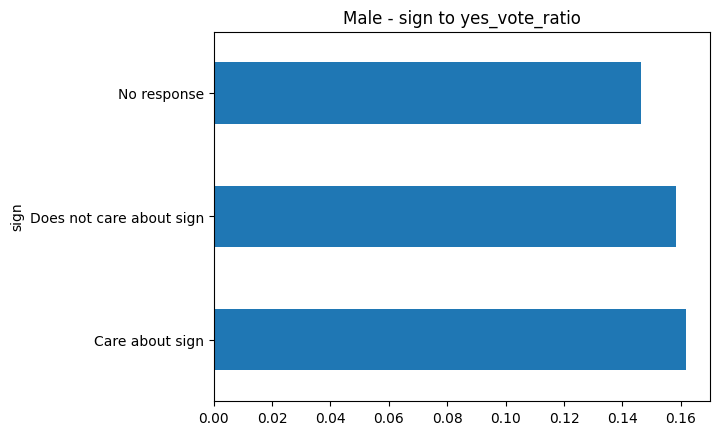

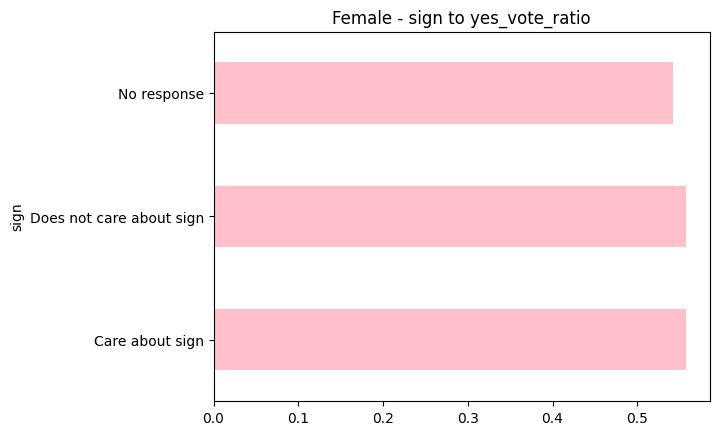

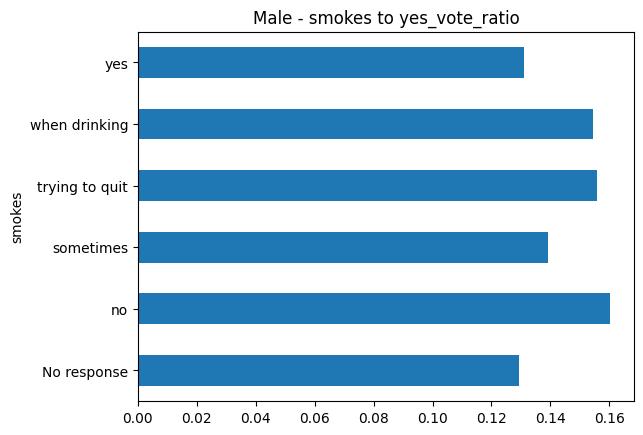

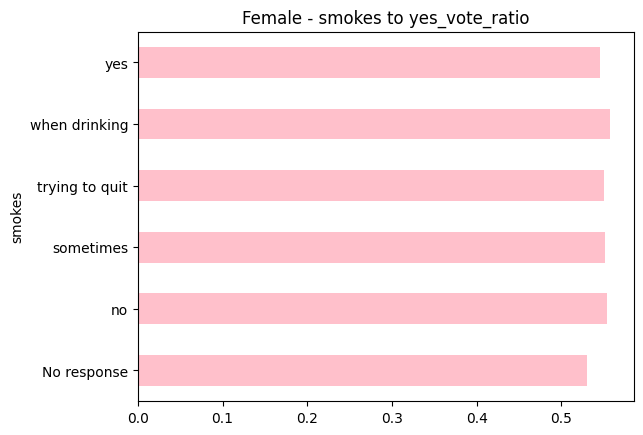

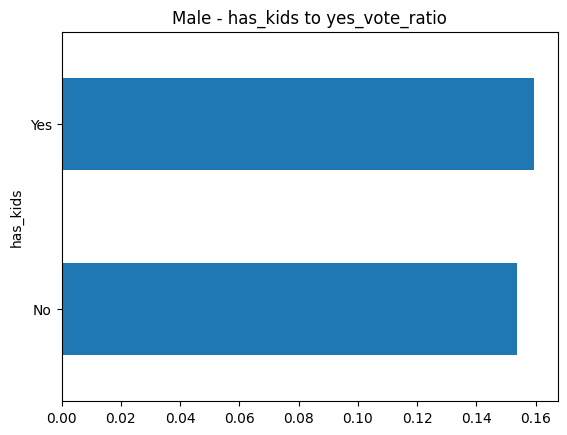

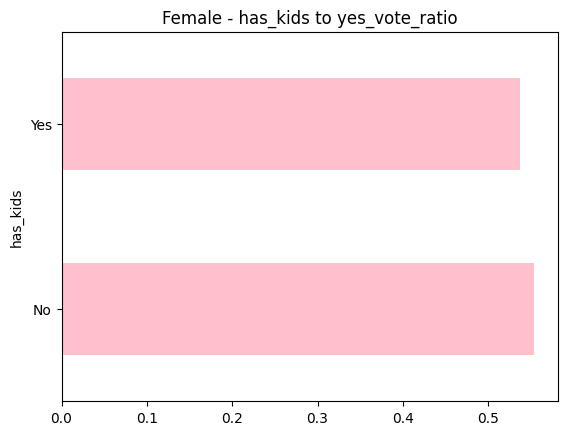

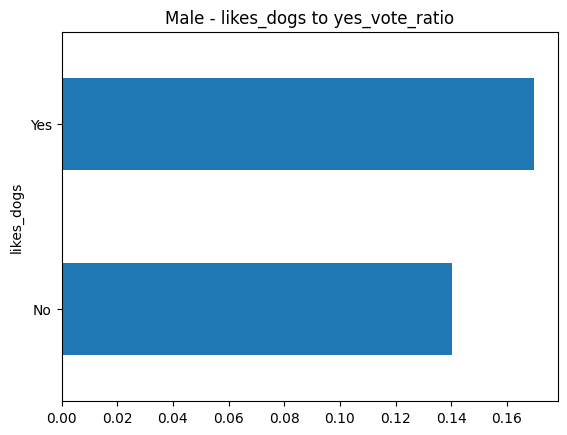

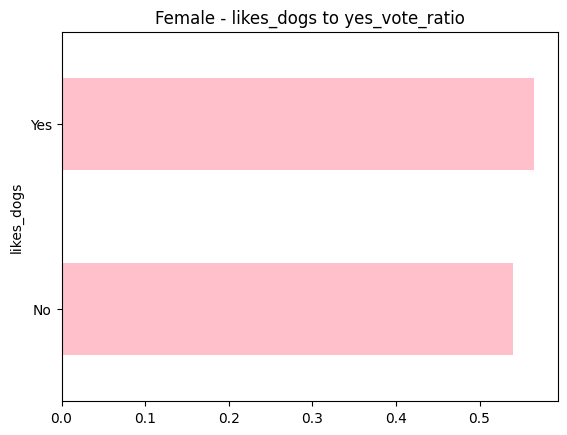

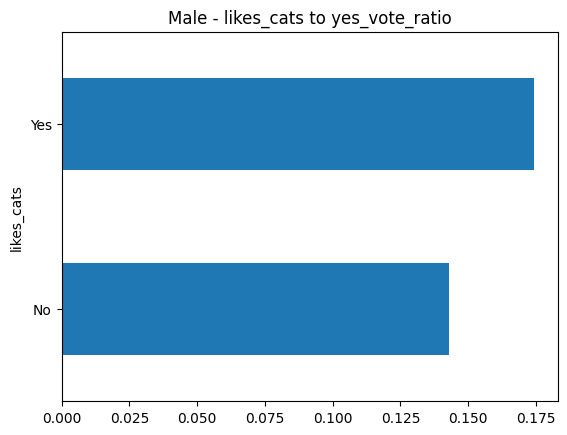

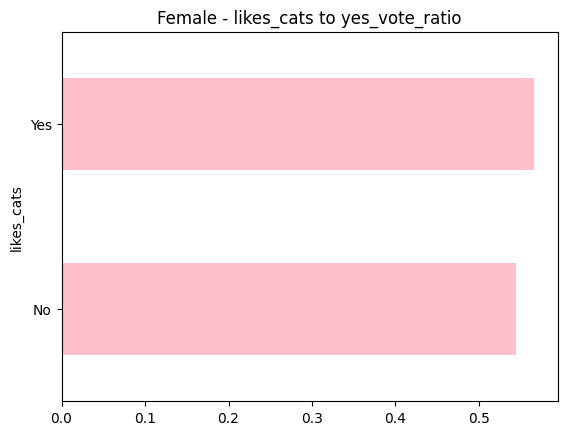

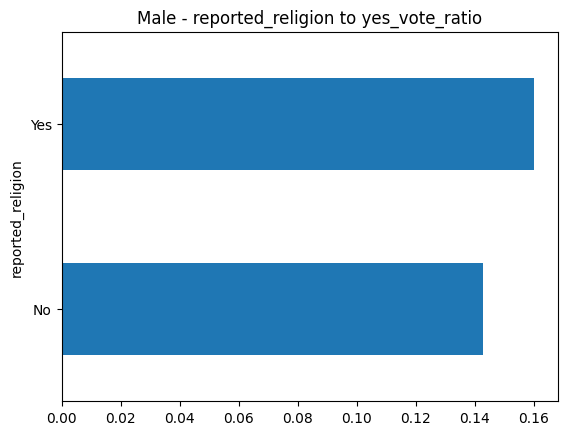

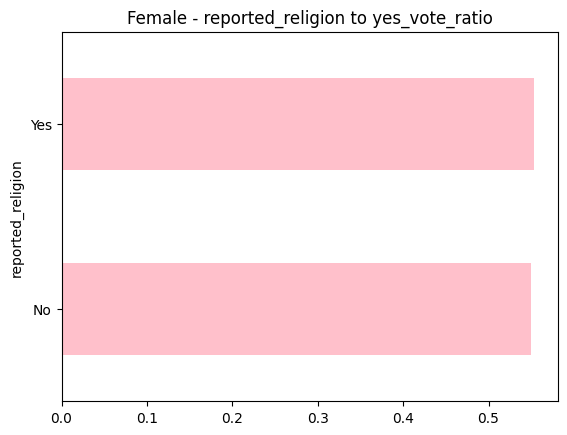

In [89]:
for cat in categorical_vars:
    m_data.groupby(cat).mean()['yes_vote'].plot.barh()
    plt.title('Male - ' + cat +' to yes_vote_ratio')
    plt.show()
    f_data.groupby(cat).mean()['yes_vote'].plot.barh(color='Pink')
    plt.title('Female - ' + cat +' to yes_vote_ratio')
    plt.show()

# Hypothesis testing

### Bonferroni correction - Target p value = 0.0038

We will carry out 13 hypothesis tests. 

Therefore the p value that our tests must obtain for them to be significant is 0.05/13 = 0.0038

### A/B Testing function
We will use the following function to carry out A/B tests in the categorical variables

In [90]:
def ab_test_mean_diff_hist(dataset, variable, category, colour='#57A0D3'):
    yvr_mean = dataset.yes_vote.mean()
    variable_yvr = dataset.loc[dataset[variable]==category,'yes_vote'].mean()
    var_length = dataset[dataset[variable]==category].shape[0]
    exp_yvrs = []
    for n in list(range(1,1000+1)):
        s1 = dataset.sample(var_length, random_state=n)
        s1_yvr = s1.yes_vote.mean()
        exp_yvrs.append(s1_yvr)
    pd.Series(exp_yvrs).plot.hist(label='Sampling distrib.',color=colour)
    plt.axvline(yvr_mean, label='Sample YVR mean', color='Green')
    plt.axvline(variable_yvr, label=category+' YVR mean', color = 'Red')
    plt.legend()
    extreme = []
    for element in exp_yvrs:
        if element >= variable_yvr:
            extreme.append(1)
        else:
            extreme.append(0)
    p_value = sum(extreme)/len(extreme)
    if p_value >= 0.5:
        p_value_2 = 1 - p_value
    else:
        p_value_2 = p_value
    p_value_2 = round(p_value_2, 3)
    plt.suptitle('Testing: ' +variable + ' - '+ category)
    plt.title('p value: '+ str(p_value_2))
    return plt.show()

### Males - Body type

Jacked have the highest YVR. Is it significant or due to randomness?

H0:     All body types have the same YVR

H1: Not all body types have the same YVR

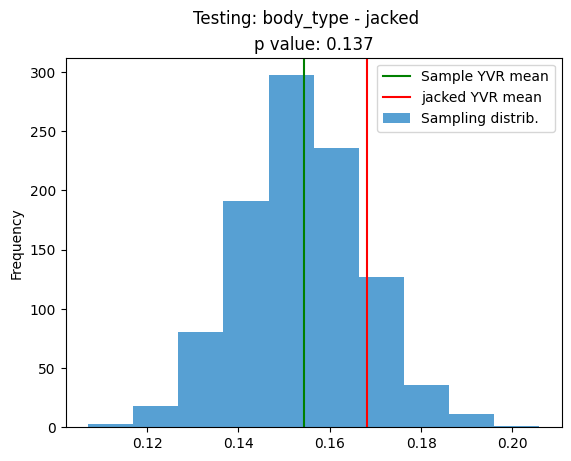

In [91]:
ab_test_mean_diff_hist(m_data,'body_type','jacked')

#### Conclusion

Jacked have a higher YVR due to randomness.

We can't conclude that users who are jacked have a significantly higher YVR.

-----------------------------------------------------------------------------------------

### Females - Body type

Overweight have the lowest YVR. Is it significant or due to randomness?

H0:     All body types have the same YVR

H1: Not all body types have the same YVR

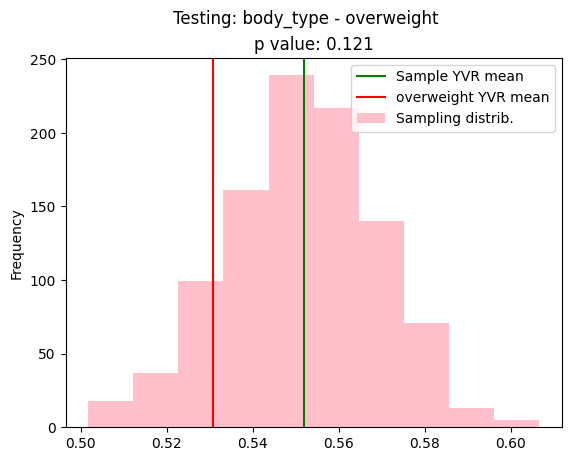

In [92]:
ab_test_mean_diff_hist(f_data, 'body_type', 'overweight', 'pink')

#### Conclusion

Overweight females have a lower YVR due to randomness.

We can't conclude that females who are overweight have a significantly lower YVR.

-----------------------------------------------------------------------------------------

### Males - Drugs

Males that do drugs often have the lowest YVR. Is it significant or due to chance?

H0:     All drug habits have the same YVR

H1: Not all drug habits have the same YVR

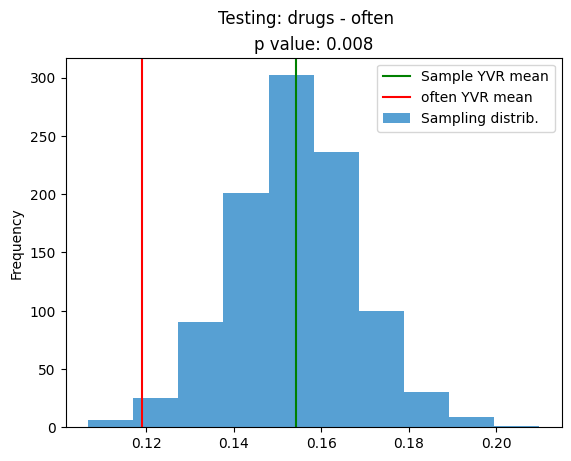

In [93]:
ab_test_mean_diff_hist(m_data,'drugs','often')

#### Conclusion

Users who take drugs often have a significantly lower YVR.

-----------------------------------------------------------------------------------------

### Males - Ethnicity

Black males have the lowest YVR. Is it significant or due to chance?

H0:     All ethnicities have the same YVR

H1: Not all ethnicities have the same YVR

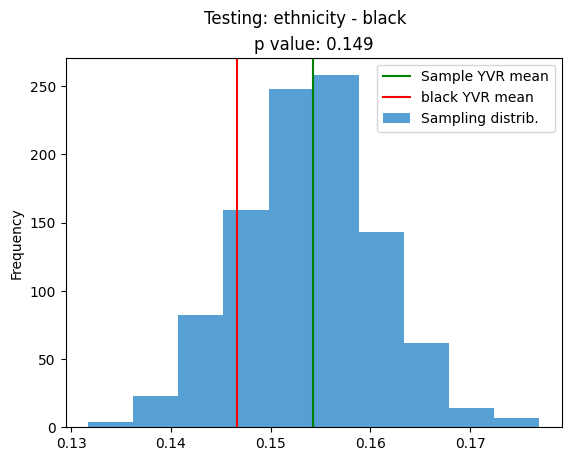

In [94]:
ab_test_mean_diff_hist(m_data,'ethnicity','black')

#### Conclusion

We can't conclude that black males have a significantly lower YVR.

-----------------------------------------------------------------------------------------

### Males - Job (1/2)

Unemployed males have the highest YVR. Is it significant or due to chance?

H0:     All jobs have the same YVR

H1: Not all jobs have the same YVR

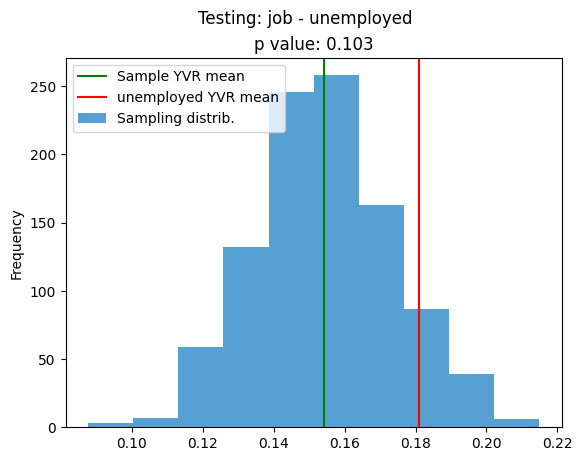

In [95]:
ab_test_mean_diff_hist(m_data,'job','unemployed')

#### Conclusion

We can't conclude that unemployed males have a significantly higher YVR.

-----------------------------------------------------------------------------------------

### Males - Job (2/2)

Clerical / administrative males have the lowest YVR. Is it significant or due to chance?

H0:     All jobs have the same YVR

H1: Not all jobs have the same YVR

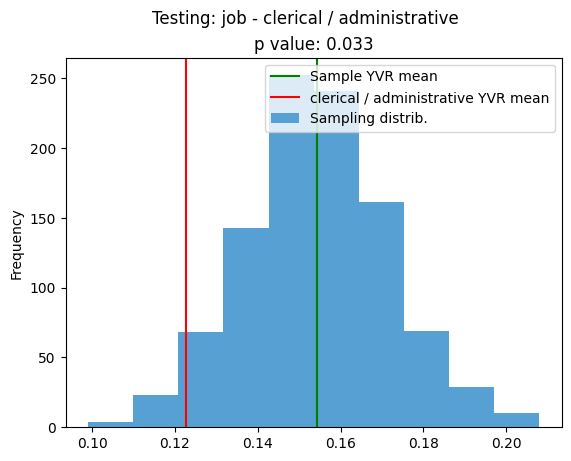

In [96]:
ab_test_mean_diff_hist(m_data,'job','clerical / administrative')

#### Conclusion

We can't conclude that clerical / administrative males have a significantly lower YVR.

-----------------------------------------------------------------------------------------

### Females - Job

Retired females have the lowest YVR. Is it significant or due to chance?

H0:     All jobs have the same YVR

H1: Not all jobs have the same YVR

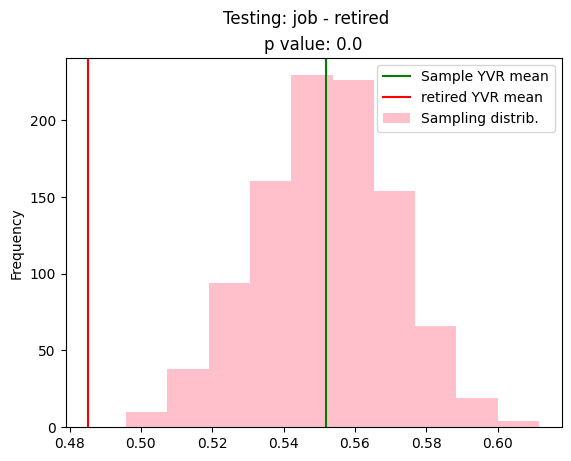

In [97]:
ab_test_mean_diff_hist(f_data,'job','retired', 'Pink')

#### Conclusion

Retired females have a significantly lower YVR.

-----------------------------------------------------------------------------------------

### Males - Sign importance

Males who care about their sign have the highest YVR. Is it significant or due to chance?

H0: Males who care about their sign and those who don't,       have the same YVR

H1: Males who care about their sign and those who don't, don't have the same YVR

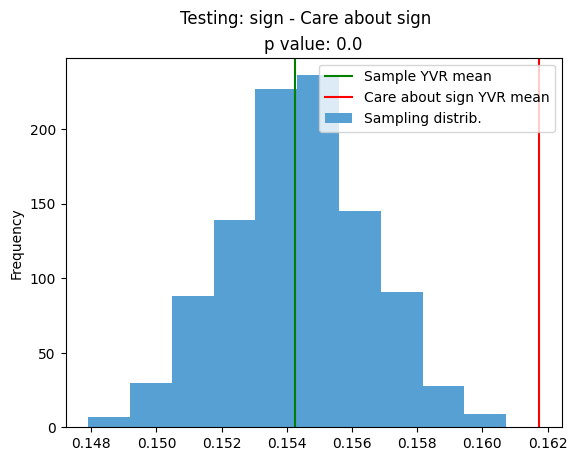

In [98]:
ab_test_mean_diff_hist(m_data,'sign','Care about sign')

#### Conclusion

Males who care about their sign have a significantly higher YVR.

-----------------------------------------------------------------------------------------

### Males - Smokes

Males who don't smoke have the highest YVR. Is it significant or due to chance?

H0:     All smoking habits have the same YVR

H1: Not all smoking habits have the same YVR

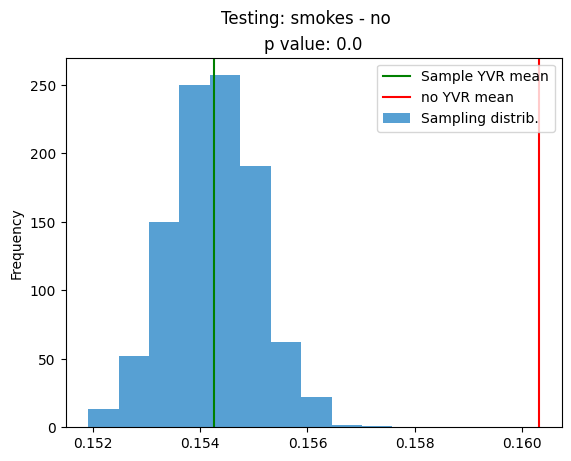

In [99]:
ab_test_mean_diff_hist(m_data,'smokes','no')

#### Conclusion

Males who don't smoke have a significantly higher YVR.

-----------------------------------------------------------------------------------------

### Females - Kids

Females with kids have the lowest YVR. Is it significant or due to chance?

H0: Females with and without kids       have the same YVR

H1: Females with and without kids don't have the same YVR

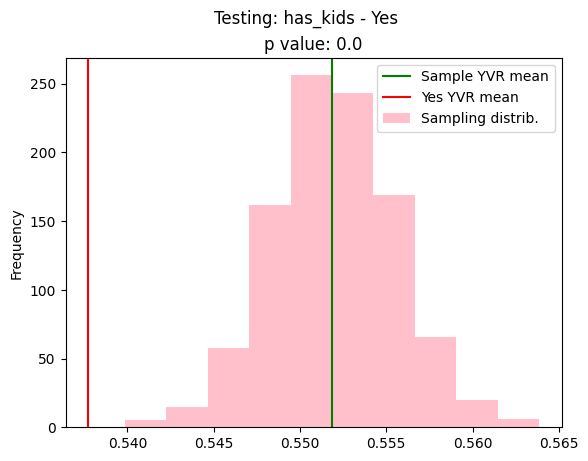

In [100]:
ab_test_mean_diff_hist(f_data,'has_kids','Yes', 'Pink')

#### Conclusion

Females with kids have a significantly lower YVR.

-----------------------------------------------------------------------------------------

### Males - Dogs

Males who like dogs have the highest YVR. Is it significant or due to chance?

H0: Males like and those who don't like dogs       have the same YVR

H1: Males like and those who don't like dogs don't have the same YVR

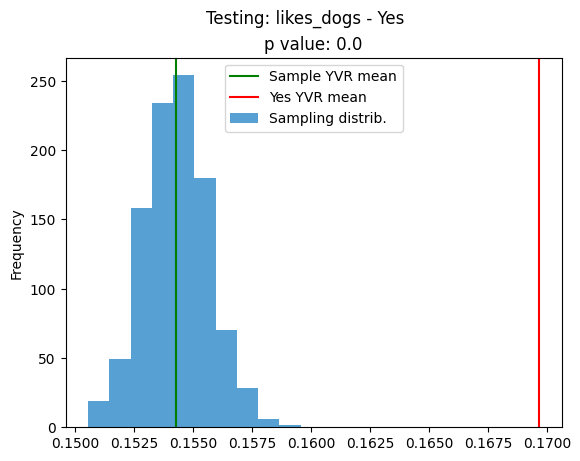

In [101]:
ab_test_mean_diff_hist(m_data,'likes_dogs','Yes')

#### Conclusion

Males who like dogs have a significantly higher YVR.

-----------------------------------------------------------------------------------------

### Males - Cats

Males who like cats have the highest YVR. Is it significant or due to chance?

H0: Males like and those who don't like cats       have the same YVR

H1: Males like and those who don't like cats don't have the same YVR

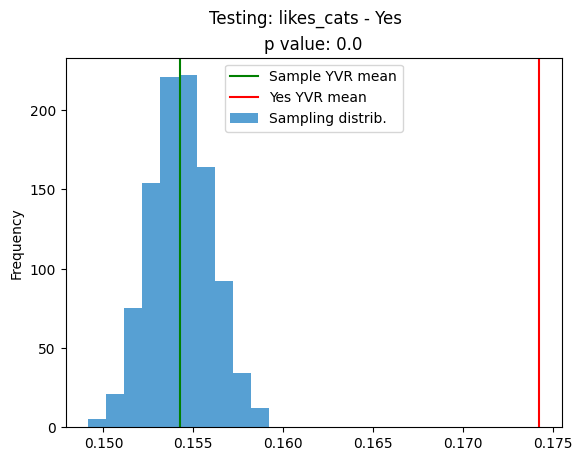

In [102]:
ab_test_mean_diff_hist(m_data,'likes_cats','Yes')

#### Conclusion

Males who like cats have a significantly higher YVR.

-----------------------------------------------------------------------------------------

### Males - Religion

Males who reported their religion have the highest YVR. Is it significant or due to randomness?

H0: Males who reported their religion and those who didn't,       have the same YVR

H1: Males who reported their religion and those who didn't, don't have the same YVR

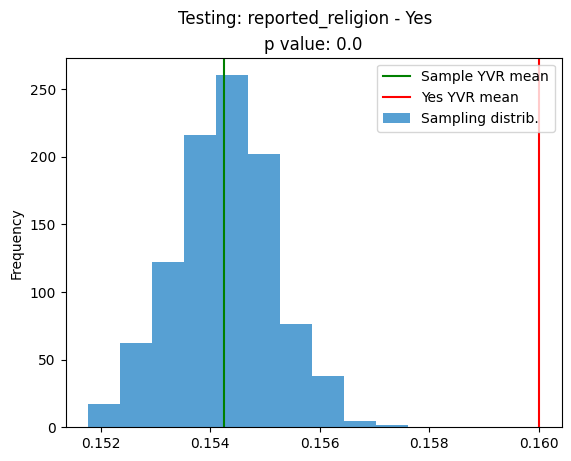

In [103]:
ab_test_mean_diff_hist(m_data,'reported_religion','Yes')

#### Conclusion

Males who reported their religion have a significantly higher YVR.

-----------------------------------------------------------------------------------------

numerical
shared attributes
models

In [104]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve

In [105]:
def scores(model, X_train, X_val, y_train, y_val):
    train_prob = model.predict_proba(X_train)[:,1]
    val_prob = model.predict_proba(X_val)[:,1]
    train = roc_auc_score(y_train,train_prob)
    val = roc_auc_score(y_val,val_prob)
    print('train:',round(train,2),'test:',round(val,2))

In [118]:
def annot(fpr,tpr,thr):
    k=0
    for i, j in zip(fpr,tpr):
        if k % 50 == 0:
            plt.annotate(round(thr[k],2),
                         xy=(i,j), 
                         textcoords='data')
        k+=1

In [106]:
def roc_plot(model,X_train,y_train,X_val,y_val):
    train_prob = model.predict_proba(X_train)[:,1]
    val_prob = model.predict_proba(X_val)[:,1]
    plt.figure(figsize=(7,7))
    for data in [[y_train, train_prob],[y_val, val_prob]]: # ,[y_test, test_prob]
        fpr, tpr, threshold = roc_curve(data[0], data[1])
        plt.plot(fpr, tpr)
    annot(fpr, tpr, threshold)
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.ylabel('TPR (power)')
    plt.xlabel('FPR (alpha)')
    plt.legend(['train','val'])
    plt.show()

In [107]:
def opt_plots(opt_model):
    opt = pd.DataFrame(opt_model.cv_results_)
    cols = [col for col in opt.columns if ('mean' in col or 'std' in col) and 'time' not in col]
    params = pd.DataFrame(list(opt.params))
    opt = pd.concat([params,opt[cols]],axis=1,sort=False)
    
    plt.figure(figsize=[15,4])
    plt.subplot(121)
    sns.heatmap(pd.pivot_table(opt,index='max_depth',columns='min_samples_leaf',values='mean_train_score')*100)
    plt.title('ROC_AUC - Training')
    plt.subplot(122)
    sns.heatmap(pd.pivot_table(opt,index='max_depth',columns='min_samples_leaf',values='mean_test_score')*100)
    plt.title('ROC_AUC - Validation')
#     return opt

In [108]:
m_data_2 = m_data.copy()
f_data_2 = f_data.copy()

In [109]:
m_data_2.yes_vote.value_counts(normalize=True, bins=4)

(-0.002, 0.25]    0.760625
(0.25, 0.5]       0.197435
(0.75, 1.0]       0.021515
(0.5, 0.75]       0.020424
Name: yes_vote, dtype: float64

In [110]:
m_data_2.yes_vote.mean()

0.1542504545454179

In [111]:
m_data_2.head(3)

age       body_type    drinks        drugs ethnicity  height_cm  \
0   22  a little extra  socially        never     other     190.50   
1   35         average     often    sometimes     white     177.80   
2   38            thin  socially  No response     other     172.72   

         income                   job sex                      sign  \
0  20033.890965        transportation   m               No response   
1  80000.000000  hospitality / travel   m               No response   
2  20033.890965           No response   m  Does not care about sign   

      smokes  UID has_kids likes_dogs likes_cats reported_religion  yes_vote  
0  sometimes    0       No        Yes        Yes               Yes  0.000000  
1         no    1       No        Yes        Yes               Yes  0.166667  
2         no    2       No         No         No                No  0.000000

In [112]:
target = 'yes_vote'
m_data_2['good'] = np.where(m_data_2[target]>=0.1,1,0)

cols_to_drop = [1,2,3,4,7,8,9,10,11,12,13,14,15,16,17]
X = m_data_2.drop(m_data_2.columns[cols_to_drop], axis=1).copy()


y = m_data_2['good']

y.value_counts()

0    17028
1    13230
Name: good, dtype: int64

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=.2,random_state=42)

In [116]:
model = RandomForestClassifier(n_estimators=10,n_jobs=-1,random_state=42)
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10, n_jobs=-1, random_state=42)

train: 0.69 test: 0.51


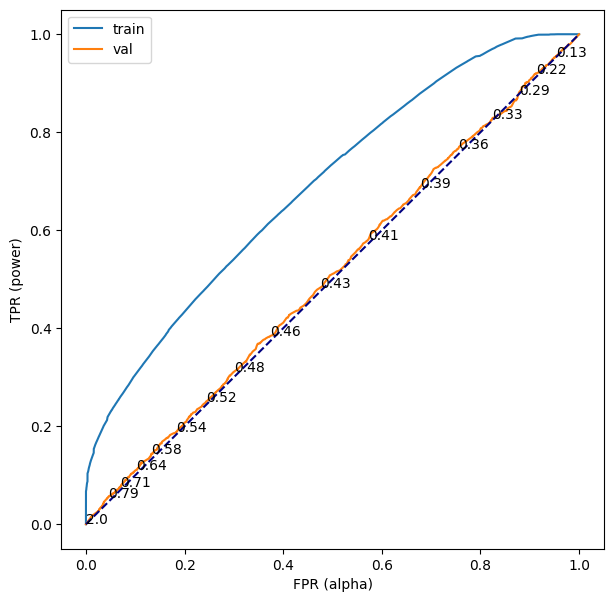

In [119]:
scores(model,X_train,X_val,y_train,y_val)
roc_plot(model,X_train,y_train,X_val,y_val)

In [122]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=3, random_state=777, shuffle=True)
from sklearn.model_selection import GridSearchCV

# Creating an optimisation grid
param_grid = {'max_depth':range(1,8+1),
              'min_samples_leaf':[5,10,15,20,25,30]}

# Instantiating the searcher
opt_model = GridSearchCV(model, param_grid, cv=skf,
                         scoring='roc_auc', return_train_score=True)

# Fitting the learners for each parameter combination K times
opt_model.fit(X_train, y_train)

best_model = opt_model.best_estimator_

<AxesSubplot:>

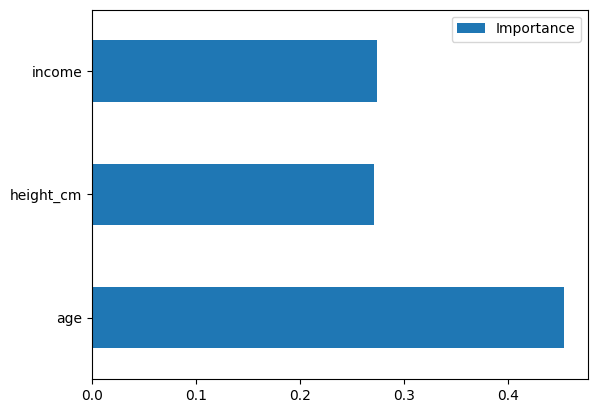

In [127]:
pd.DataFrame(best_model.feature_importances_, columns=['Importance'], index=X.columns).plot.barh()

In [136]:
target = 'yes_vote'
f_data_2['good'] = np.where(f_data_2[target]>=0.6,1,0)

cols_to_drop = [1,2,3,4,7,8,9,10,11,12,13,14,15,16,17]
X = f_data_2.drop(f_data_2.columns[cols_to_drop], axis=1).copy()


y = f_data_2['good']

y.value_counts()

0    11784
1     8745
Name: good, dtype: int64

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=.2,random_state=42)

In [138]:
model = RandomForestClassifier(n_estimators=10,n_jobs=-1,random_state=42)
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10, n_jobs=-1, random_state=42)

train: 0.68 test: 0.52


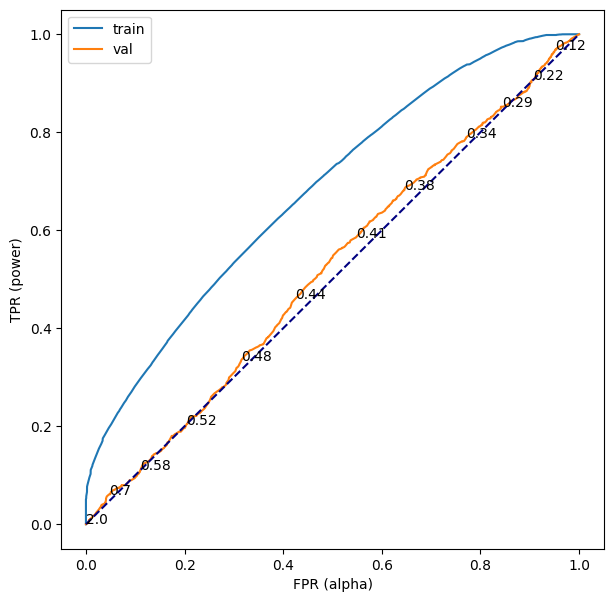

In [139]:
scores(model,X_train,X_val,y_train,y_val)
roc_plot(model,X_train,y_train,X_val,y_val)

In [140]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=3, random_state=777, shuffle=True)
from sklearn.model_selection import GridSearchCV

# Creating an optimisation grid
param_grid = {'max_depth':range(1,8+1),
              'min_samples_leaf':[5,10,15,20,25,30]}

# Instantiating the searcher
opt_model = GridSearchCV(model, param_grid, cv=skf,
                         scoring='roc_auc', return_train_score=True)

# Fitting the learners for each parameter combination K times
opt_model.fit(X_train, y_train)

best_model = opt_model.best_estimator_

<AxesSubplot:>

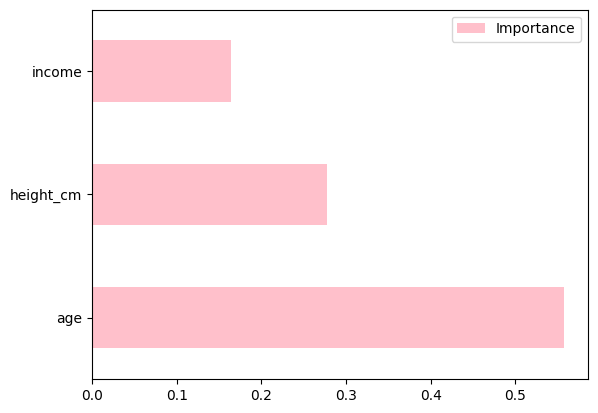

In [141]:
pd.DataFrame(best_model.feature_importances_, columns=['Importance'], index=X.columns).plot.barh(color='Pink')